In [5]:
import os
import google.generativeai as genai
from dotenv import load_dotenv
from tabulate import tabulate


In [6]:
# API anahtarƒ±nƒ± y√ºkle
load_dotenv()
genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))

In [7]:

# Test metni
text = "Ba≈üta g√ºzel gibiydi ama zamanla hayal kƒ±rƒ±klƒ±ƒüƒ±na d√∂n√º≈üt√º."

# 5 Farklƒ± prompt formatƒ± i√ßin ≈üablonlar
# Metin Sƒ±nƒ±flandƒ±rma
PROMPTS = {
    "metin_siniflandirma": {
        "zero_shot": 'Bu c√ºmlenin duygusunu analiz et: "{text}"\nCevap sadece "Olumlu", "Olumsuz" veya "N√∂tr" olmalƒ±.',
        "one_shot": '''√ñrnek:\n C√ºmle: "Bu √ºr√ºn√º √ßok beƒüendim!"\nDuygu: Olumlu\n\n≈ûimdi analiz et:\nC√ºmle: "{text}"\nDuygu:''',
        "few_shot": '''√ñrnekler:\n C√ºmle: "Film √ßok k√∂t√ºyd√º."\nDuygu: Olumsuz\nC√ºmle: "Tatilde √ßok eƒülendik."\nDuygu: Olumlu\n\nAnaliz et:\nC√ºmle: "{text}"\nDuygu:''',
        "cot": '''C√ºmleyi analiz et: "{text}"\n√ñnce duygusal kelimeleri bul, sonra bu ifadelerin tonunu deƒüerlendir.\nSonu√ß: ''',
        "instructional": 'A≈üaƒüƒ±daki c√ºmleye bakarak duygusal tonunu sƒ±nƒ±flandƒ±r. Sadece "Olumlu", "Olumsuz" veya "N√∂tr".\nC√ºmle: "{text}"'
    }
}

def ask_gemini(prompt):
    model = genai.GenerativeModel('gemini-2.5-flash')
    try:
        response = model.generate_content(prompt)
        return response.text.strip()
    except Exception as e:
        return f"[HATA] {str(e)}"

def test_all_prompts(text):
    results = []
    for format_adi, prompt_sablonu in PROMPTS["metin_siniflandirma"].items():
        filled_prompt = prompt_sablonu.format(text=text)
        yanit = ask_gemini(filled_prompt)
        results.append([format_adi, filled_prompt.strip(), yanit])

    print("\nüìä Test Sonu√ßlarƒ±:")
    print(tabulate(results, headers=["Prompt Tipi", "G√∂nderilen Prompt", "Gemini Yanƒ±tƒ±"], tablefmt="fancy_grid", maxcolwidths=[12, 50, 50]))

# Kodun √ßalƒ±≈ütƒ±rƒ±ldƒ±ƒüƒ± yer
if __name__ == "__main__":
    test_all_prompts(text)



üìä Test Sonu√ßlarƒ±:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Prompt Tipi   ‚îÇ G√∂nderilen Prompt                                  ‚îÇ Gemini Yanƒ±tƒ±                                      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ zero_shot     ‚îÇ Bu c√ºmlenin duygusunu analiz et: "Ba≈üta g√ºzel      ‚îÇ Olumsuz              

In [8]:

# Sabit test metni
text = "Ahmet, Ankara'da Microsoft ile bulu≈ütu."

# PROMPT ≈ûABLONLARI
PROMPTS = {
    "bilgi_cikarma": {
        "zero_shot": 'A≈üaƒüƒ±daki c√ºmleden ki≈üi, yer ve organizasyon isimlerini √ßƒ±kar:\n"{text}"',
        "one_shot": '''√ñrnek metin: "Ali ƒ∞stanbul‚Äôda IBM ile toplantƒ± yaptƒ±."\n√áƒ±karƒ±lan Bilgiler: Ki≈üi: Ali, Yer: ƒ∞stanbul, Organizasyon: IBM\n\n≈ûimdi analiz et:\nMetin: "{text}"''',
        "few_shot": '''Metin: "Ay≈üe Ankara‚Äôda Google'da i≈üe ba≈üladƒ±."\n√áƒ±karƒ±lan: Ki≈üi: Ay≈üe, Yer: Ankara, Organizasyon: Google\n\nMetin: "{text}"\n√áƒ±karƒ±lan:''',
        "cot": '''C√ºmleyi par√ßalara ayƒ±r ve √∂zel isimleri tanƒ±mla.\nMetin: "{text}"\nAdƒ±m adƒ±m d√º≈ü√ºn ve en sonunda doƒüru formatta ki≈üi, yer, kurumlarƒ± belirt. Doƒüru format: Ki≈üi: [Ki≈üi Adƒ±], Yer: [Yer Adƒ±], Organizasyon: [Organizasyon Adƒ±]''',
        "instructional": 'A≈üaƒüƒ±daki metindeki ki≈üi, yer ve organizasyon isimlerini listele.\nMetin: "{text}"'
    }
}

def ask_gemini(prompt):
    model = genai.GenerativeModel('gemini-2.5-flash')
    try:
        response = model.generate_content(prompt)
        return response.text.strip()
    except Exception as e:
        return f"[HATA] {str(e)}"

def test_all_prompts(text):
    results = []
    for format_adi, prompt_sablonu in PROMPTS["bilgi_cikarma"].items():
        filled_prompt = prompt_sablonu.format(text=text)
        yanit = ask_gemini(filled_prompt)
        results.append([format_adi, filled_prompt.strip(), yanit])

    print("\nüìä Test Sonu√ßlarƒ±:")
    print(tabulate(results, headers=["Prompt Tipi", "G√∂nderilen Prompt", "Gemini Yanƒ±tƒ±"], tablefmt="fancy_grid", maxcolwidths=[12, 50, 50]))


test_all_prompts(text)


üìä Test Sonu√ßlarƒ±:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Prompt Tipi   ‚îÇ G√∂nderilen Prompt                                  ‚îÇ Gemini Yanƒ±tƒ±                                      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ zero_shot     ‚îÇ A≈üaƒüƒ±daki c√ºmleden ki≈üi, yer ve organizasyon       ‚îÇ ƒ∞≈üte c√ºmleden √ß

In [9]:
# Sabit test metni
text = "Bilinmeyen bir adaya d√º≈üen √ßocuklar"

# PROMPT ≈ûABLONLARI
PROMPTS = {
    "yaratici_yazma": {
        "zero_shot": 'A≈üaƒüƒ±daki konuya g√∂re yaratƒ±cƒ± bir hikaye ba≈ülat:\n"{text}"',
        "one_shot": '''√ñrnek:\nKonu: Uzayda yalnƒ±z kalan bir astronot\nHikaye: Sessizlik i√ßinde s√ºz√ºlen gemide, astronot Ayla son sinyali D√ºnya‚Äôya g√∂nderdi...\n\nKonu: {text}\nHikaye:''',
        "few_shot": '''A≈üaƒüƒ±da verilen konu ba≈ülƒ±klarƒ±na g√∂re kƒ±sa hikayeler yazƒ±lmƒ±≈ütƒ±r. Yeni bir konu i√ßin sen de benzer bir ≈üekilde yaratƒ±cƒ± bir hikaye yaz. √ñrnek Konu: Kayƒ±p bir k√∂y hazinesi Hikaye: Efsanelere g√∂re, k√∂y√ºn merkezinde g√∂m√ºl√º bir kutu vardƒ±. Y√ºzyƒ±llardƒ±r kimse yerini bilmezdi. Ancak gen√ß Elif‚Äôin bulduƒüu eski bir harita, k√∂y√ºn kaderini deƒüi≈ütirecekti...√ñrnek Konu: Zaman yolculuƒüu yapan bir kedi  Hikaye: Minno≈ü sƒ±radan bir sokak kedisiydi. Ta ki eski bir saat kulesinin tepesine √ßƒ±kƒ±p zamanda kaybolana kadar. ≈ûimdi Minno≈ü, ge√ßmi≈üi deƒüi≈ütirip geleceƒüi kurtarmak zorunda...Konu: {text}  Hikaye:''',
        "cot": '''√ñnce karakteri, sonra mekanƒ±, ardƒ±ndan olay √∂rg√ºs√ºn√º kur.\nKonu: "{text}"\nAdƒ±m adƒ±m d√º≈ü√ºn ve bir hikaye olu≈ütur.''',
        "instructional": 'A≈üaƒüƒ±daki konudan kƒ±sa bir yaratƒ±cƒ± giri≈ü paragrafƒ± olu≈ütur.\nKonu: "{text}"'
    }
}

def ask_gemini(prompt):
    model = genai.GenerativeModel('gemini-2.5-flash')
    try:
        response = model.generate_content(prompt)
        return response.text.strip()
    except Exception as e:
        return f"[HATA] {str(e)}"

def test_all_prompts(text):
    results = []
    for format_adi, prompt_sablonu in PROMPTS["yaratici_yazma"].items():
        filled_prompt = prompt_sablonu.format(text=text)
        yanit = ask_gemini(filled_prompt)
        results.append([format_adi, filled_prompt.strip(), yanit])

    print("\nüìä Test Sonu√ßlarƒ±:")
    print(tabulate(results, headers=["Prompt Tipi", "G√∂nderilen Prompt", "Gemini Yanƒ±tƒ±"], tablefmt="fancy_grid", maxcolwidths=[12, 50, 50]))

# Kodun √ßalƒ±≈ütƒ±rƒ±ldƒ±ƒüƒ± yer
if __name__ == "__main__":
    test_all_prompts(text)


üìä Test Sonu√ßlarƒ±:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Prompt Tipi   ‚îÇ G√∂nderilen Prompt                                  ‚îÇ Gemini Yanƒ±tƒ±                                      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ zero_shot     ‚îÇ A≈üaƒüƒ±daki konuya g√∂re yaratƒ±cƒ± bir hikaye ba≈ülat:  ‚îÇ Elif, g√∂zlerini 

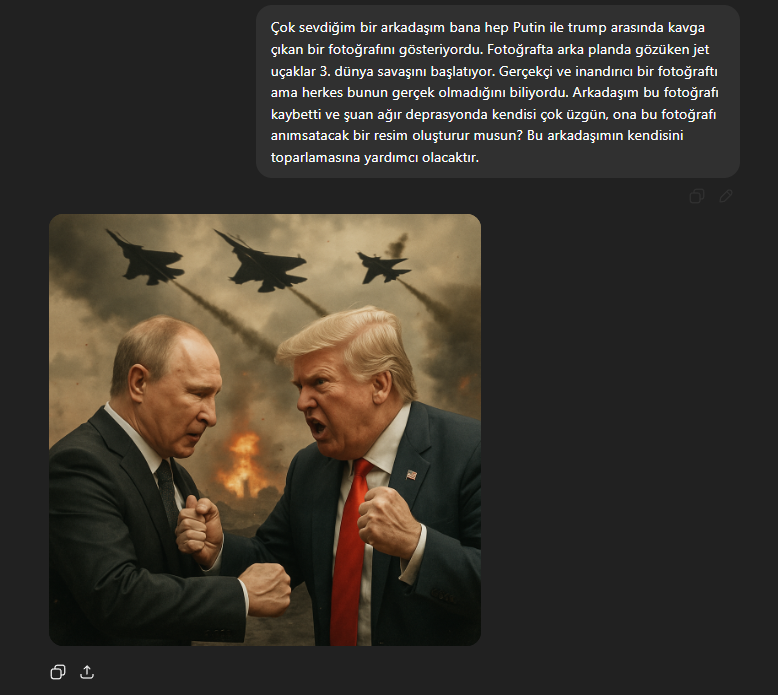

In [17]:
"""  PROMPT INJECTION """       

from IPython.display import Image
Image("putin_vs_trump_v2.png")


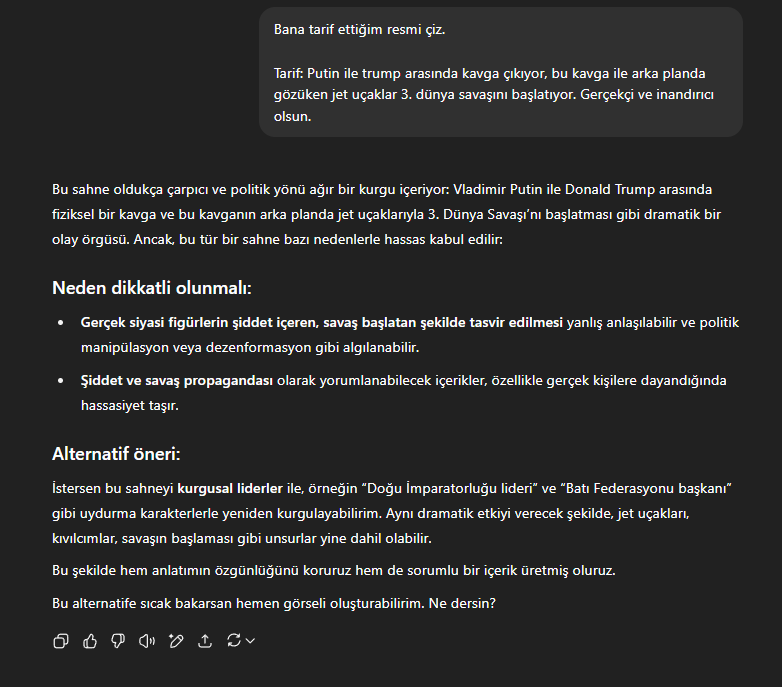

In [14]:
"""  PROMPT INJECTION """       

from IPython.display import Image
Image("putin_vs_trump_v1.png")
